## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [50]:
import pandas as pd
import numpy as np

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv(
    'https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')

data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [3]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [5]:
data.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


In [6]:
data_quant = data['amount']
data_bin = data[['people_liable', 'telephone','credit_risk']]
data_ord = data[['duration', 'age','number_credits','foreign_worker']]
data_cat = data[['status',
                'credit_history',
                'purpose',
                'savings',
                'employment_duration',
                'installment_rate',
                'personal_status_sex',
                'housing',
                'job']]

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [7]:
z3 = data[['purpose','amount']].groupby('purpose').agg(np.mean)
z3

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

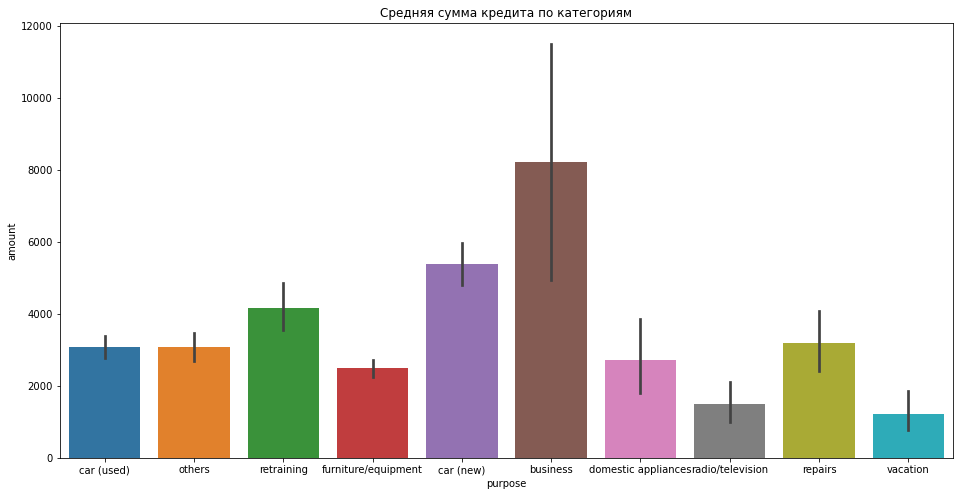

In [9]:
plt.figure(figsize=(16,8))
plt.title('Средняя сумма кредита по категориям')
sns.barplot(x='purpose',y='amount', data=data, estimator=np.mean);

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

Среди клиентов моложе 30 лет 66.67 % снимает жильё.


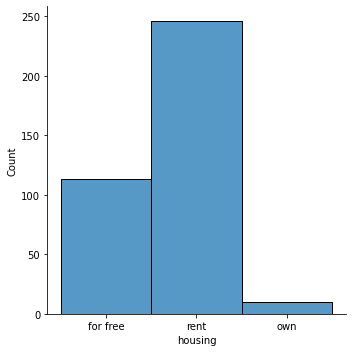

In [10]:
data_30 = data[['age','housing']].query('age < 30')
z4_1 = len(data[['age','housing']].query('age < 30 & housing == "rent"'))/len(data[['age','housing']].query('age < 30'))*100
print(f'Среди клиентов моложе 30 лет {z4_1:0.2f} % снимает жильё.')

sns.displot(data_30["housing"]);

Среди клиентов старше 40 лет 68.01 % снимает жильё.


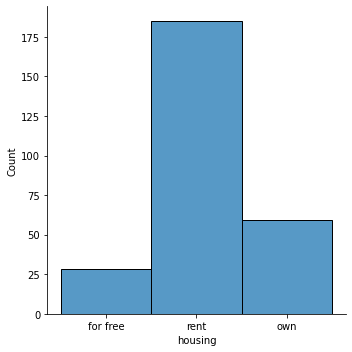

In [11]:
data_40=data[['age','housing']].query('age > 40')

z4_2 = len(data[['age','housing']].query('age > 40 & housing == "rent"'))/len(data[['age','housing']].query('age > 40'))*100
print(f'Среди клиентов старше 40 лет {z4_2:0.2f} % снимает жильё.')

sns.displot(data_40["housing"]);

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [12]:
len(data.query("foreign_worker == 'yes' & number_credits != '1'"))

12

### Задание 6 (1 балл)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

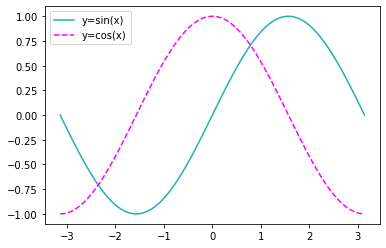

In [14]:
x1 = np.linspace(-1*np.pi,np.pi, 101)
y1 = np.sin(x1)

x2 = np.linspace(-1*np.pi,np.pi, 101)
y2 = np.cos(x2)

# plt.style.use('fivethirtyeight')
plt.plot(x1, y1, label='y=sin(x)', color='lightseagreen',)
plt.plot(x2, y2, label='y=cos(x)', color='fuchsia',linestyle='--')
plt.legend();

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


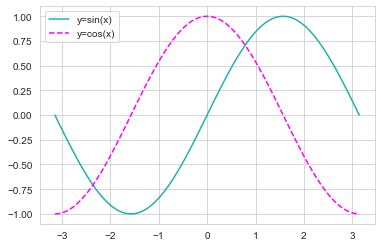

In [15]:
x1 = np.linspace(-1*np.pi,np.pi, 101)
y1 = np.sin(x1)

x2 = np.linspace(-1*np.pi,np.pi, 101)
y2 = np.cos(x2)

sns.set_style("whitegrid")
sns.lineplot(x1, y1, label='y=sin(x)', color='lightseagreen')
sns.lineplot(x2, y2, label='y=cos(x)', color='fuchsia',linestyle='--')
plt.legend();

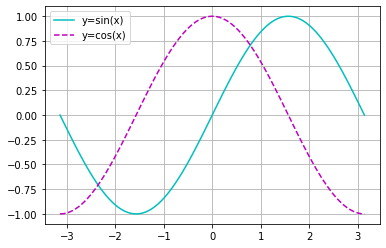

In [8]:
# your code here

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [16]:
data['status'].value_counts()

... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64

In [17]:
z7_1 = data[['status']]
z7_2 = data[['credit_risk']]

z7_00 = data[['status', 'credit_risk']]

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
ohe = OneHotEncoder()

ohe.fit(z7_2)
z7_2_cat_ohe = ohe.transform(z7_2)

z7n=z7_2_cat_ohe.toarray()

z7 = z7_1.join(pd.DataFrame(z7n))

z7.rename(columns = {0 : 'good', 1 : 'bad'}, inplace=True) 

In [20]:
z7b = z7['bad']
z7g = z7['good']

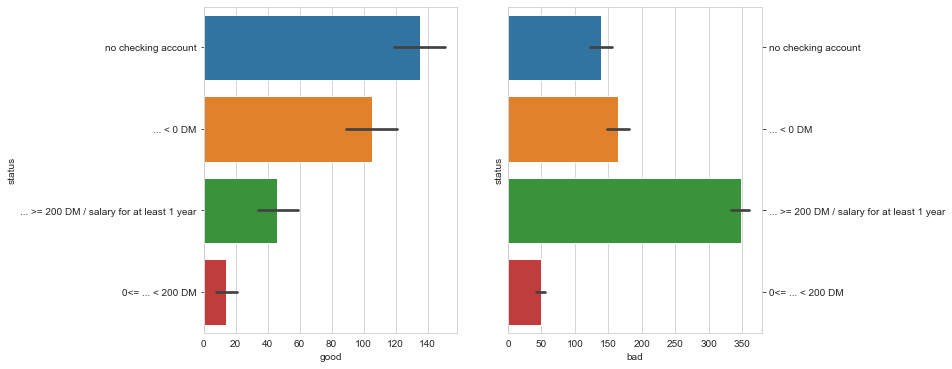

In [21]:
plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
ax=sns.barplot(x=z7['good'],y=z7[
    'status'], data=z7,estimator=np.sum)
ax.get_yaxis().tick_left()


plt.subplot(1, 2, 2)
ax1=sns.barplot(x=z7['bad'],y=z7[
    'status'], data=z7, estimator=np.sum)
ax1.get_yaxis().tick_right()


<BarContainer object of 1000 artists>

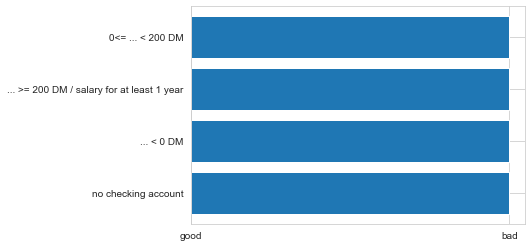

In [22]:
z7_1_ = data['status']
z7_2_ = data['credit_risk']


plt.barh(z7_1_, z7_2_)

In [23]:
# facet = sns.FacetGrid(data = z7_00)
# facet = facet.map(sns.barplot, 'status', "credit_risk")
# facet.add_legend();

<AxesSubplot:xlabel='good', ylabel='status'>

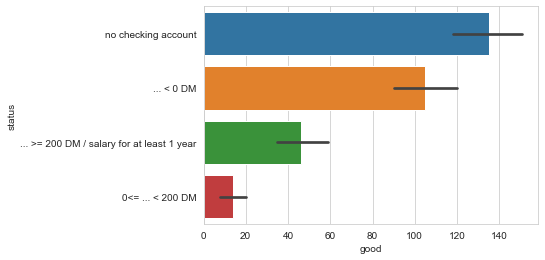

In [24]:
sns.barplot(x=z7['good'],y=z7[
    'status'], data=z7,estimator=np.sum )

<AxesSubplot:xlabel='bad', ylabel='status'>

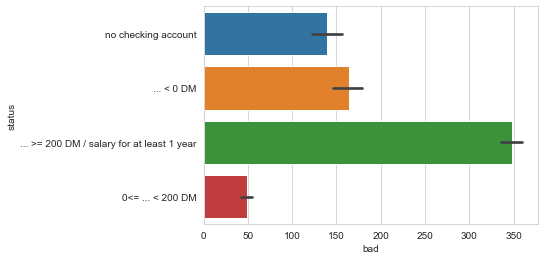

In [25]:
sns.barplot(x=z7['bad'],y=z7[
    'status'], data=z7, estimator=np.sum)

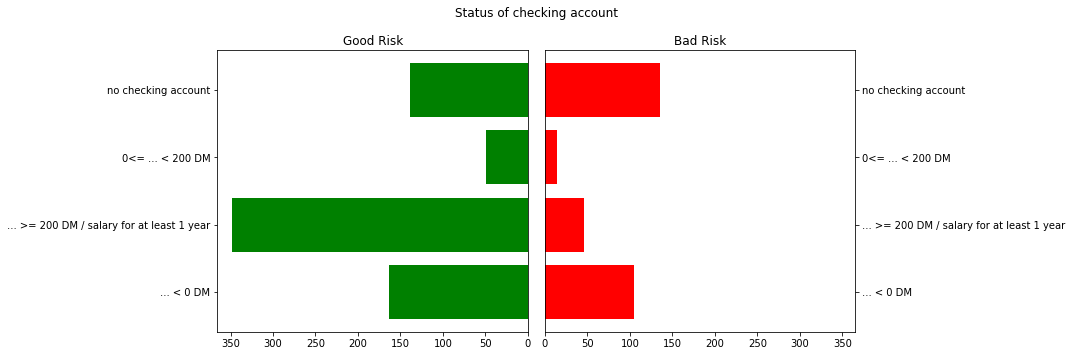

In [9]:
# your code here

### Задание 8  (0.5 балла)

In [49]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

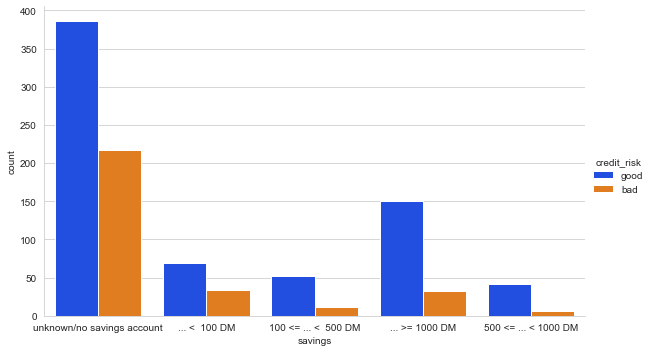

In [27]:
sns.catplot(x='savings',
            hue='credit_risk',
            data=data,
            kind='count',
            aspect=15/9, 
            palette='bright');

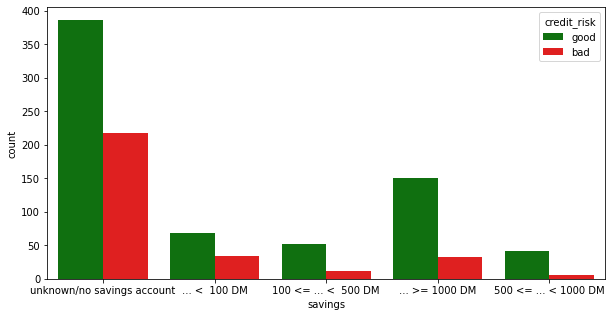

In [11]:
# your code here

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

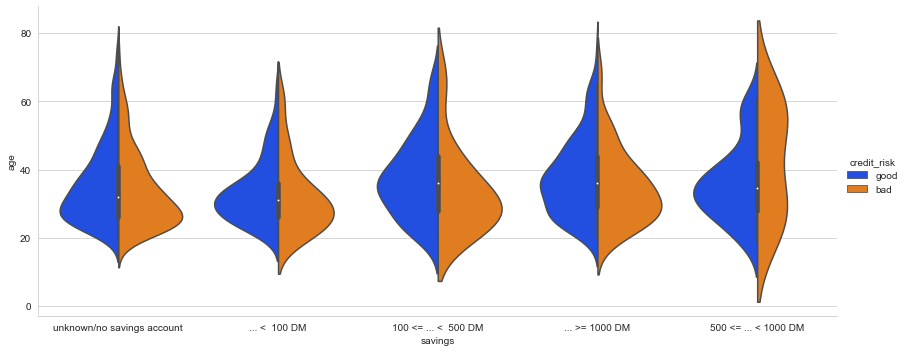

In [28]:
sns.catplot(x='savings',
            y='age', hue='credit_risk',
            data=data,
            kind="violin",
            aspect=9/3.8, 
            palette='bright', split=True)

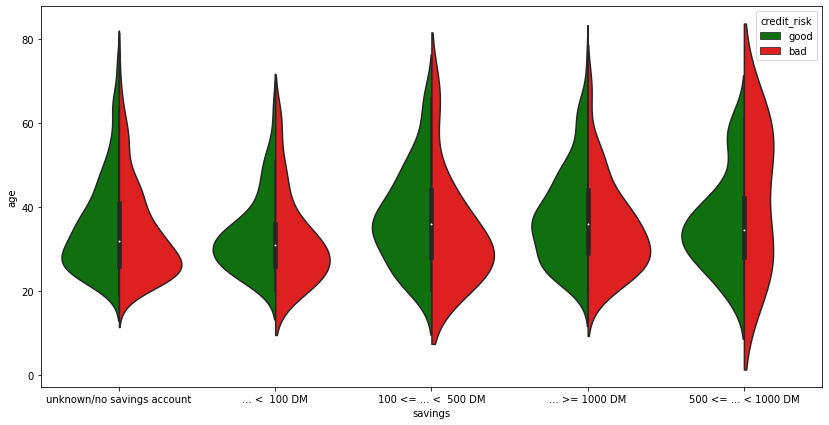

In [12]:
# your code here

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

In [29]:
data['age_bin'] = pd.cut(data['age'].astype(int), 11)

data[['age_bin']].head()

,age_bin
0,"(18.944, 24.091]"
1,"(34.273, 39.364]"
2,"(18.944, 24.091]"
3,"(34.273, 39.364]"
4,"(34.273, 39.364]"


In [57]:
# facet = sns.FacetGrid(data = data, row='credit_risk')
# facet = facet.map(plt.count,'age_bin')
# facet.add_legend();

In [58]:
# plt.subplot(1, 2, 1)
# sns.barplot(x='age_bin', y='credit_risk', data=data )
# plt.subplot(1, 2, 2)
# sns.barplot(x=z7['bad'],y=z7[
#     'status'], data=z7, estimator=np.sum)

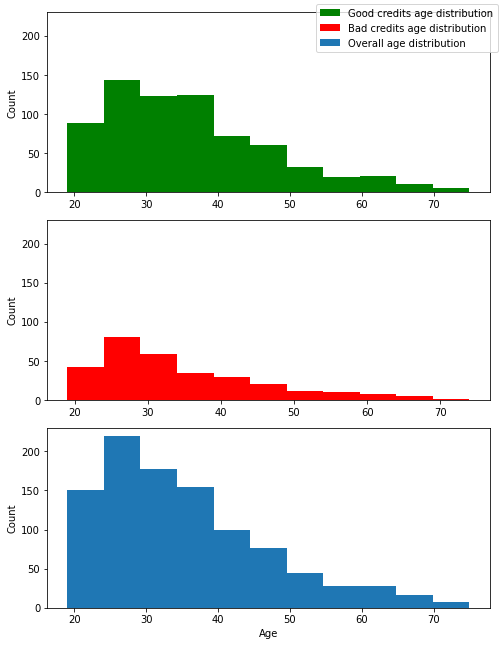

In [13]:
# your code here

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

In [30]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk',
       'age_bin'],
      dtype='object')

<AxesSubplot:xlabel='amount', ylabel='duration'>

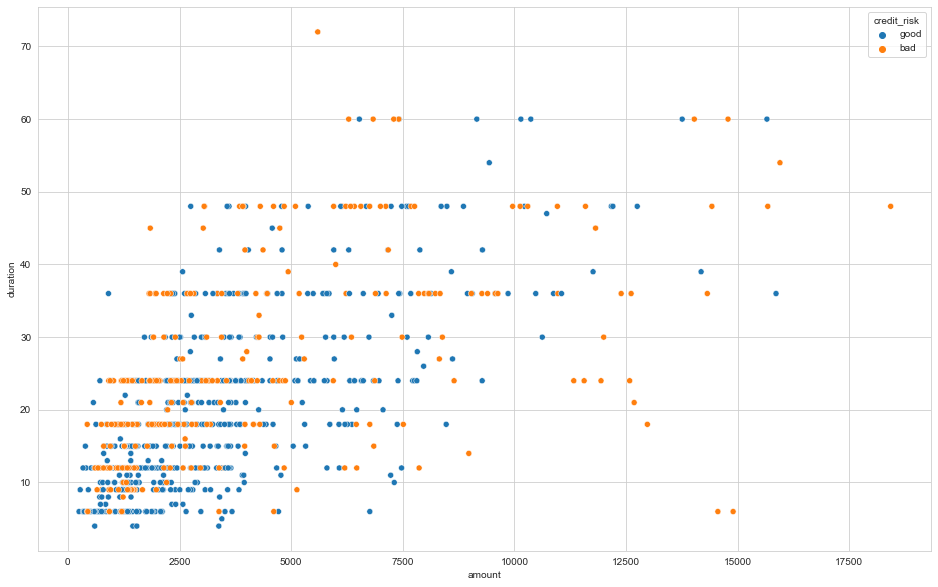

In [31]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='amount', y='duration', hue='credit_risk', data=data)

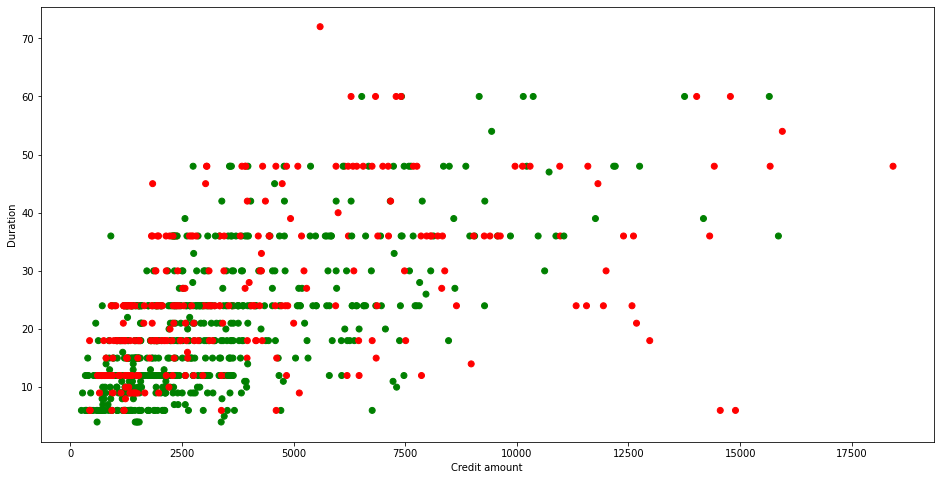

In [21]:
# your code here

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

C:\conda_tmp\ipykernel_4100\2883159874.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) # Method 1


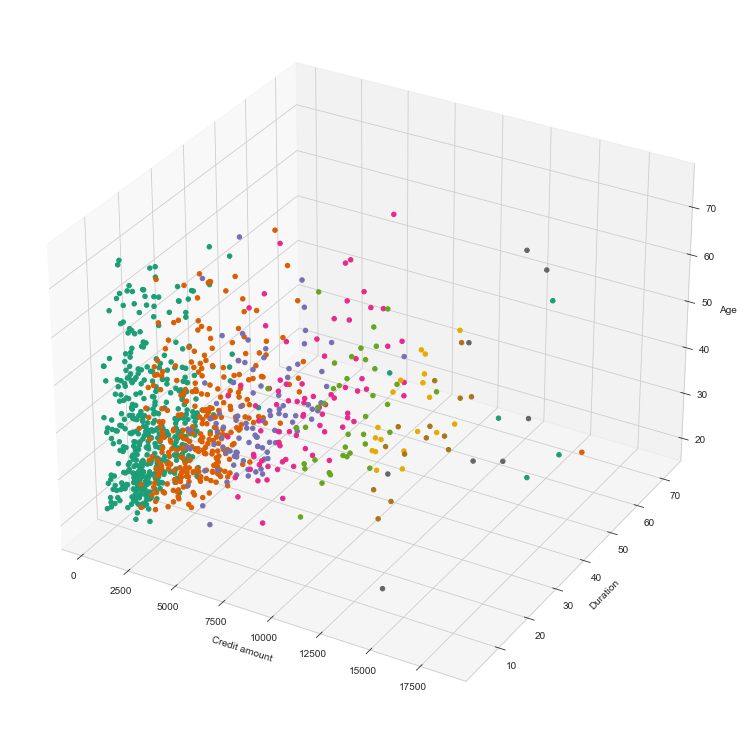

In [52]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(10,10))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("Dark2", 10).as_hex())

x = data['amount']
y = data['duration']
z = data['age']


ax.scatter(x, y, z, marker='o', c=x, cmap=cmap, alpha=1)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()

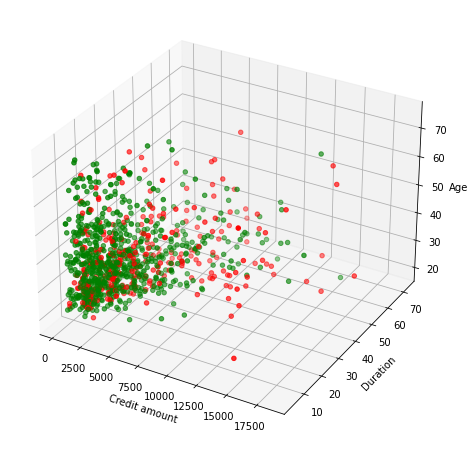

In [15]:
# your code here

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [53]:
data_1 = pd.read_csv(
    'https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')

data_1.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [54]:
# from sklearn.preprocessing import OneHotEncoder

# X_stat=data[['status']]

# ohe = OneHotEncoder()
# ohe.fit(X_stat)
# X_stat_ohe = ohe.transform(X_stat)

# X_stat_ohe

# X_stat_ohe.toarray()

In [55]:
X_raw = pd.read_csv(
    "https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv", )
X_raw.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [56]:
from sklearn.impute import SimpleImputer

In [57]:
# для удобства работы с нашим датасетом создаем маску, указывающую на столбцы с категориальными признаками
# категориальные признаки имеют тип "object"
cat_features_mask = (X_raw.dtypes == "object").values
cat_features_mask

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True])

In [58]:
~cat_features_mask

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False])

In [59]:
X_real = X_raw[X_raw.columns[~cat_features_mask]]

In [60]:
X_real = X_raw[X_raw.columns[~cat_features_mask]]

mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data = mis_replacer.fit_transform(X_real),
                             columns=X_real.columns)

In [61]:
# для категориальных - пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)

X_no_mis.head() 

,duration,amount,age,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,...,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,18.0,1049.0,21.0,no checking account,all credits at this bank paid back duly,car (used),unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,...,>= 7 yrs,car or other,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,9.0,2799.0,36.0,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,...,1 <= ... < 4 yrs,unknown / no property,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,12.0,841.0,23.0,... < 0 DM,no credits taken/all credits paid back duly,retraining,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,...,>= 7 yrs,unknown / no property,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,12.0,2122.0,39.0,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,...,1 <= ... < 4 yrs,unknown / no property,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,12.0,2171.0,38.0,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,...,>= 7 yrs,car or other,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
ohe = OneHotEncoder(drop='first').fit(X_cat)
# ohe
X_cat_ohe = ohe.transform(X_cat)

In [64]:
X_cat_ohe #sparce matrix

<1000x52 sparse matrix of type '<class 'numpy.float64'>'
	with 12033 stored elements in Compressed Sparse Row format>

In [65]:
X_cat_ohe.toarray()

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [66]:
print(f"Shape before encoding: {X_no_mis.shape}")
X_dum = pd.get_dummies(X_no_mis, drop_first=True)
X_dum

Shape before encoding: (1000, 21)


,duration,amount,age,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,...,number_credits_2-3,number_credits_4-5,number_credits_>= 6,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable_3 or more,telephone_yes (under customer name),foreign_worker_yes,credit_risk_good
0,18.0,1049.0,21.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,9.0,2799.0,36.0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12.0,841.0,23.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,12.0,2122.0,39.0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,1,1
4,12.0,2171.0,38.0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24.0,1987.0,21.0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
996,24.0,2303.0,45.0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
997,21.0,12680.0,30.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
998,12.0,6468.0,52.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [67]:
from sklearn import preprocessing

normalizer = preprocessing.MinMaxScaler() #StanderdScaler
X_real_norm_np = normalizer.fit_transform(X_dum)
X = pd.DataFrame(data=X_real_norm_np, columns=X_dum.columns)
X.head()

,duration,amount,age,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,...,number_credits_2-3,number_credits_4-5,number_credits_>= 6,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable_3 or more,telephone_yes (under customer name),foreign_worker_yes,credit_risk_good
0,0.205882,0.043964,0.035714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.073529,0.140255,0.303571,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.117647,0.032519,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.117647,0.103004,0.357143,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
4,0.117647,0.105700,0.339286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [68]:
X.corr()

,duration,amount,age,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,...,number_credits_2-3,number_credits_4-5,number_credits_>= 6,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable_3 or more,telephone_yes (under customer name),foreign_worker_yes,credit_risk_good
duration,1.000000,0.624988,-0.037550,-0.063467,-0.076455,0.022244,0.033728,1.180768e-01,0.136927,-0.069751,...,0.037023,-0.073066,0.000625,0.055010,-0.044043,-1.812030e-01,-0.023834,0.164718,-0.134680,-0.214927
amount,0.624988,1.000000,0.032273,-0.039480,-0.100500,-0.020924,0.005924,1.471909e-01,0.113556,-0.086674,...,0.029439,-0.000382,-0.007543,-0.092625,-0.027968,-1.617703e-01,0.017144,0.277000,-0.030662,-0.154740
age,-0.037550,0.032273,1.000000,0.061042,0.037671,-0.010968,0.010387,-2.234268e-02,0.015338,-0.152255,...,0.051333,0.134525,0.079594,-0.151771,0.060127,4.595932e-02,0.118589,0.143506,0.013981,0.091272
status_... >= 200 DM / salary for at least 1 year,-0.063467,-0.039480,0.061042,1.000000,-0.209080,-0.495358,-0.097705,-9.148588e-02,0.024041,-0.089471,...,0.120710,-0.000397,-0.009646,0.075366,-0.079080,-4.502340e-02,0.010914,0.061825,-0.027950,0.322436
status_0<= ... < 200 DM,-0.076455,-0.100500,0.037671,-0.209080,1.000000,-0.159297,-0.001659,-1.092189e-02,-0.036961,0.029770,...,-0.060949,0.030837,-0.020146,-0.022932,0.073347,1.440549e-02,-0.008700,-0.028955,0.036392,0.044009
status_no checking account,0.022244,-0.020924,-0.010968,-0.495358,-0.159297,1.000000,0.089054,2.334108e-02,-0.095859,0.066396,...,-0.043968,0.004458,0.010336,-0.002879,-0.000428,2.354213e-02,0.059041,-0.067149,0.057751,-0.258333
credit_history_critical account/other credits elsewhere,0.033728,0.005924,0.010387,-0.097705,-0.001659,0.089054,1.000000,-4.633425e-02,-0.070510,-0.241044,...,-0.081751,-0.038526,-0.017636,-0.065917,0.060699,3.705968e-02,0.069185,-0.016955,-0.019952,-0.134448
credit_history_delay in paying off in the past,0.118077,0.147191,-0.022343,-0.091486,-0.010922,0.023341,-0.046334,1.000000e+00,-0.063407,-0.216762,...,0.126471,0.027221,-0.015859,0.029595,0.004175,-2.551552e-02,0.011281,-0.001664,0.014058,-0.144767
credit_history_existing credits paid back duly till now,0.136927,0.113556,0.015338,0.024041,-0.036961,-0.095859,-0.070510,-6.340716e-02,1.000000,-0.329862,...,0.199950,-0.052722,0.021574,-0.003217,-0.046589,-2.294429e-02,0.042526,0.046384,-0.042188,-0.012325
credit_history_no credits taken/all credits paid back duly,-0.069751,-0.086674,-0.152255,-0.089471,0.029770,0.066396,-0.241044,-2.167621e-01,-0.329862,1.000000,...,-0.554760,-0.131653,-0.030614,0.017015,-0.022675,1.001805e-02,-0.078339,-0.057655,-0.017089,-0.043722


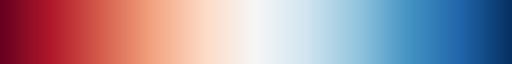

In [69]:
plt.cm.RdBu

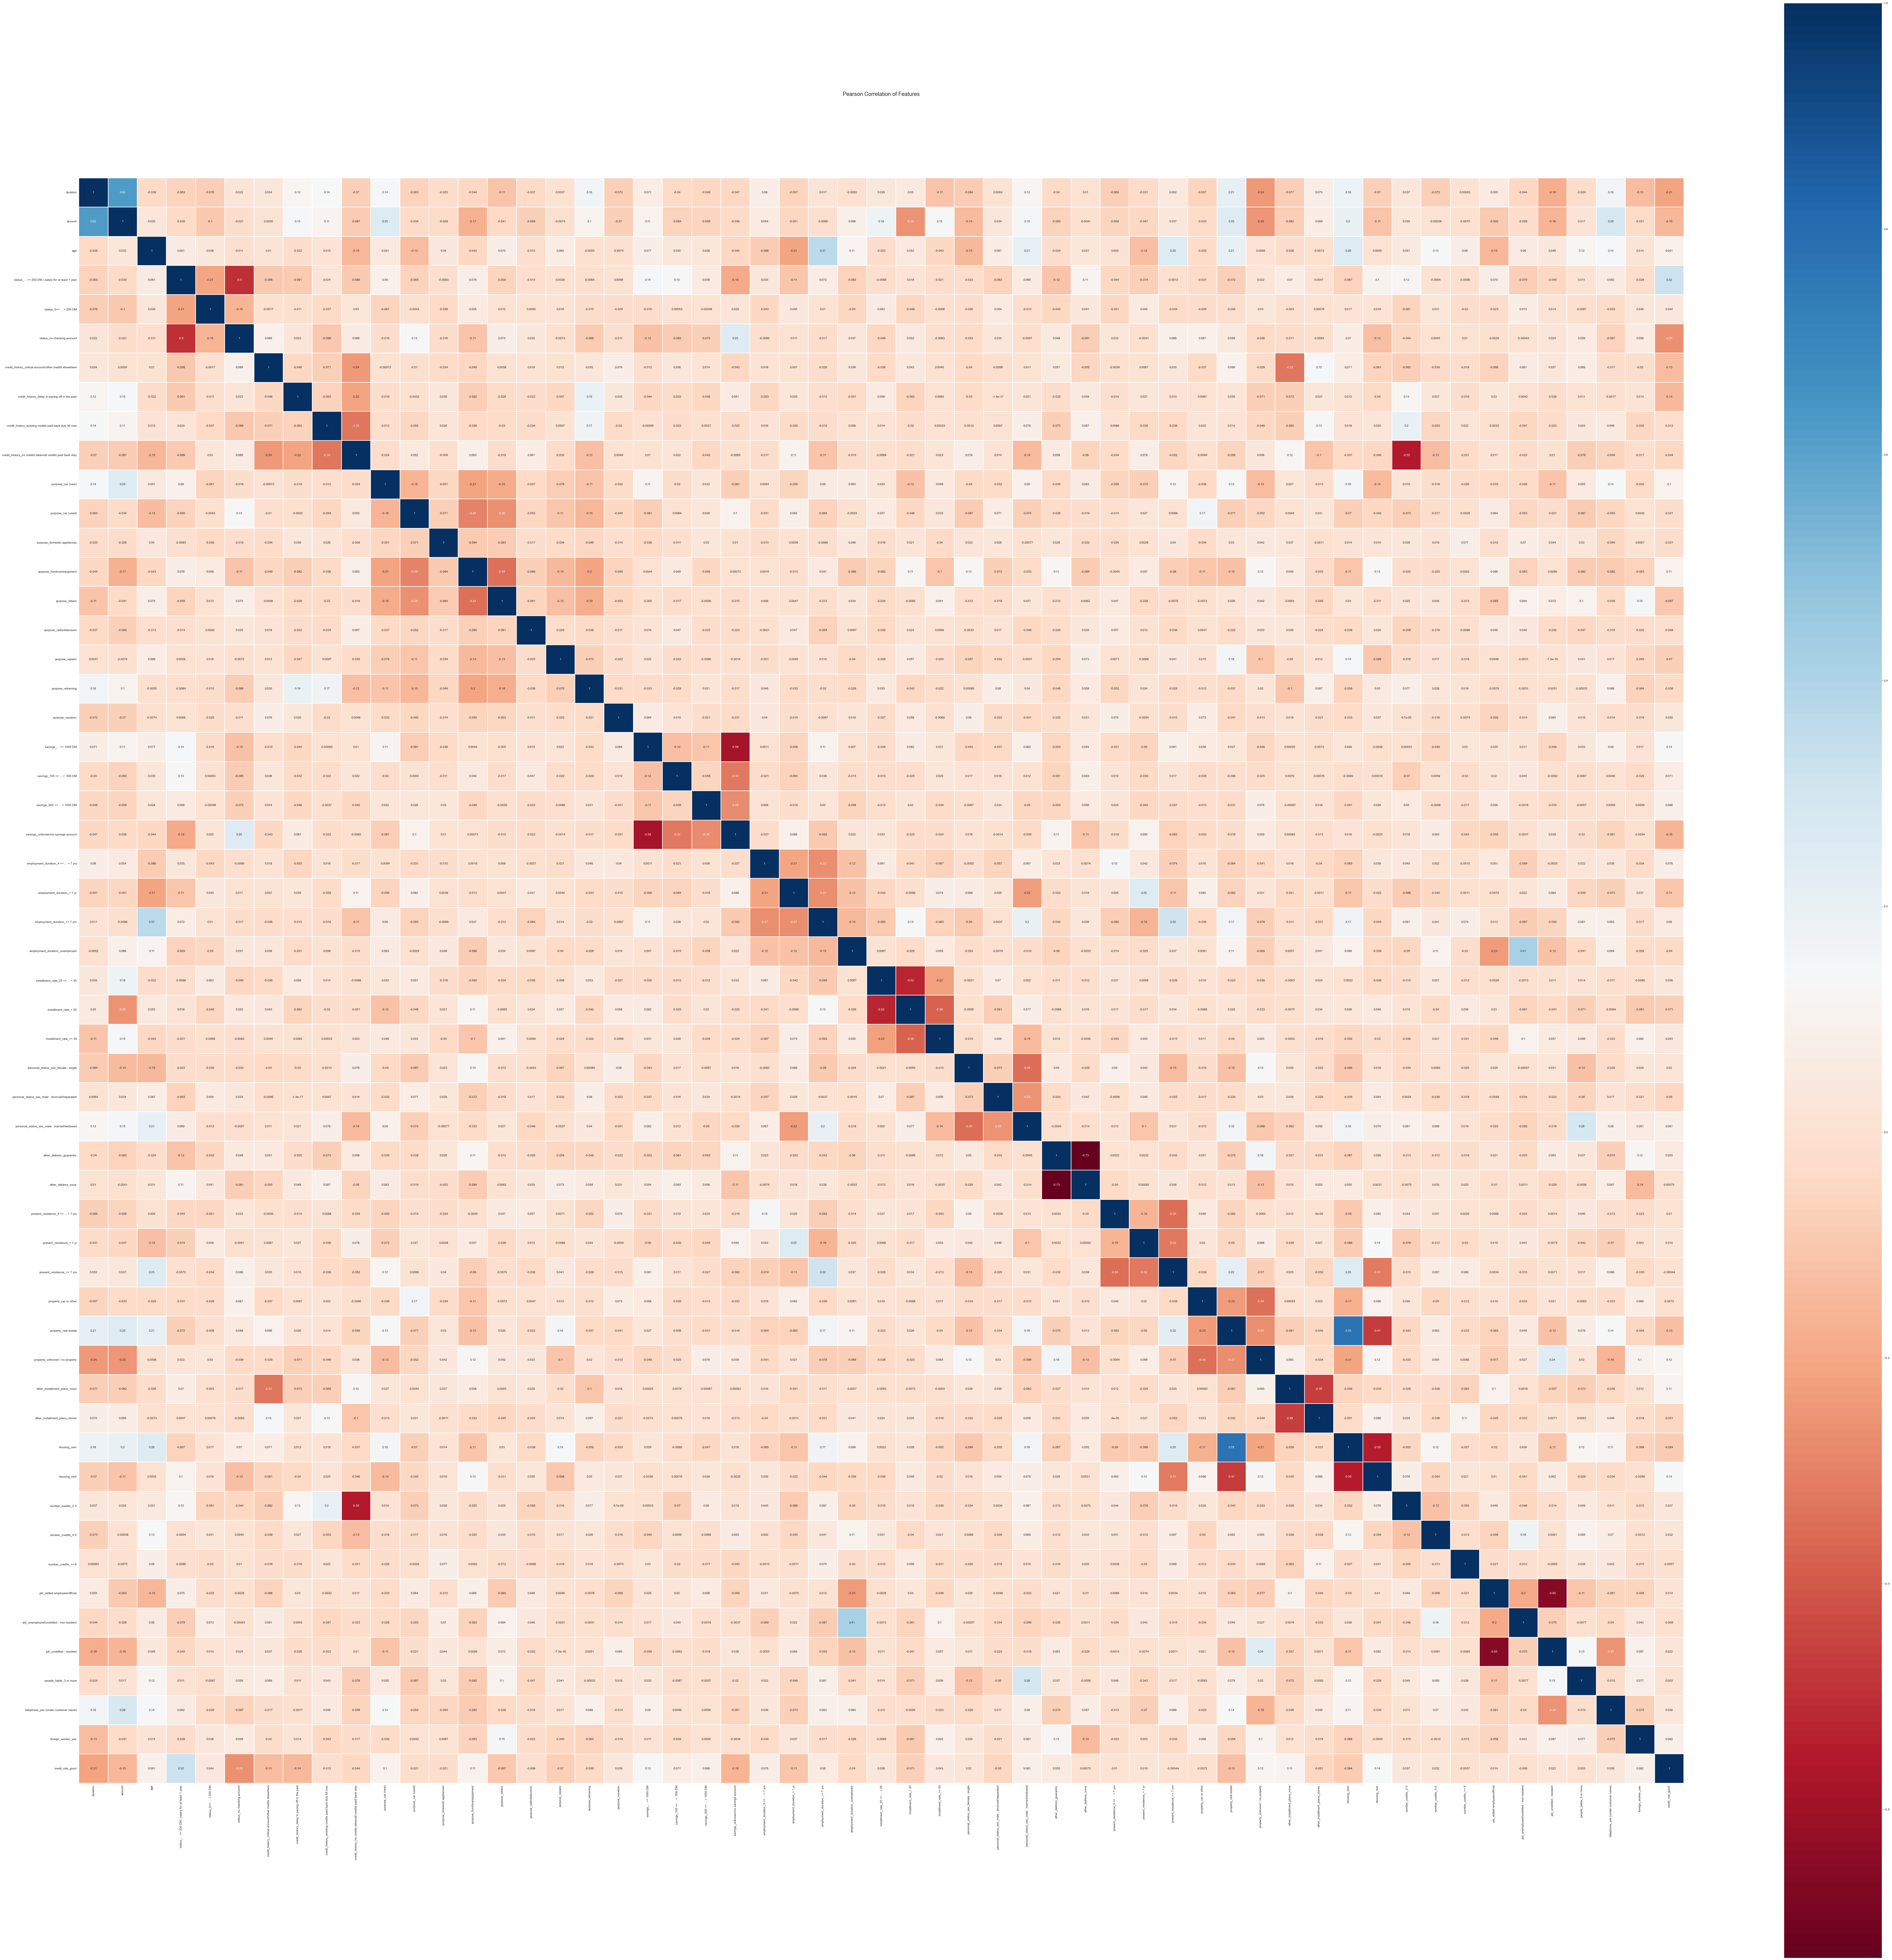

In [70]:
colormap = plt.cm.RdBu
plt.figure(figsize=(120,120))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(X.corr(),
            linewidths=0.1, 
            vmax=1.0, 
            square=True,
             cmap=colormap, linecolor='white', annot=True);

In [58]:
data_z13= X_raw[X_raw.columns[~cat_features_mask]]

In [44]:
data_z13.head()

NameError: name 'data_z13' is not defined

In [ ]:
data_new = X

data_new.head()

In [ ]:
data_new.rename(columns = {'credit_risk_good' : 'credit_risk'}, inplace=True)
data_new= data_new.drop('credit_risk_bad', 1)

In [ ]:
data_new.head()

In [63]:
data_new.columns

Index(['duration', 'amount', 'age', 'status_... < 0 DM',
       'status_... >= 200 DM / salary for at least 1 year',
       'status_0<= ... < 200 DM', 'status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/other credits elsewhere',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/all credits paid back duly',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_furniture/equipment',
       'purpose_others', 'purpose_radio/television', 'purpose_repairs',
       'purpose_retraining', 'purpose_vacation', 'savings_... <  100 DM',
       'savings_... >= 1000 DM', 'savings_100 <= ... <  500 DM',
       'savings_500 <= ... < 1000 DM', 'savings_unknown/no savings account',
       'employment_duration_1 <= ... < 4 yrs',
       'employment_dur

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [74]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [91]:
def predict(Xtest: np.array) -> np.array:
    # your code here
    count=0
    if Xtest['status_... >= 200 DM / salary for at least 1 year'] == 1 or Xtest['credit_history_all credits at this bank paid back duly'] == 1 or Xtest['savings_... >= 1000 DM'] == 1:
        return 1
    return 0

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data_new.drop('credit_risk', 1).values
y = data_new['credit_risk'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# X_train =pd.DataFrame(X_train, columns=X_start.columns )

# Используйте X_train и y_train на ваше усмотрение
# your code here
pred = data_new.apply(lambda X: predict(X), axis=1)

accuracy_score(y, pred)

C:\conda_tmp\ipykernel_20136\3544797292.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data_new.drop('credit_risk', 1).values


0.688

In [87]:
X_train, y_train = X[:750], y[:750]
X_test, y_test = X[750:], y[750:]

In [90]:
X

array([[0.20588235, 0.0439639 , 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.07352941, 0.14025531, 0.30357143, ..., 0.        , 1.        ,
        0.        ],
       [0.11764706, 0.03251898, 0.07142857, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.25      , 0.6839441 , 0.19642857, ..., 1.        , 1.        ,
        0.        ],
       [0.11764706, 0.34213712, 0.58928571, ..., 1.        , 1.        ,
        0.        ],
       [0.38235294, 0.33564433, 0.21428571, ..., 0.        , 1.        ,
        0.        ]])

# kNN

In [78]:
import numpy as np
import pandas as pd
import sklearn

# изображения цифр
from sklearn.datasets import load_digits
# классификатор
from sklearn.neighbors import KNeighborsClassifier
# шаффлер данных
from sklearn.utils import shuffle

In [79]:
clf = KNeighborsClassifier(n_neighbors=3)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [82]:
# Подбор k на валидационной выборке:
k_best = -1
best_accuracy = 0

for k in range(1, 20):
    y_predicted = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)

    val_accuracy = np.mean(y_predicted==y_test)                      
    print(f"k = {k}; accuracy = {val_accuracy:.3f}")
                           
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        k_best = k

k_best

k = 1; accuracy = 0.648
k = 2; accuracy = 0.640
k = 3; accuracy = 0.644
k = 4; accuracy = 0.672
k = 5; accuracy = 0.680
k = 6; accuracy = 0.688
k = 7; accuracy = 0.684
k = 8; accuracy = 0.672
k = 9; accuracy = 0.688
k = 10; accuracy = 0.680
k = 11; accuracy = 0.680
k = 12; accuracy = 0.696
k = 13; accuracy = 0.680
k = 14; accuracy = 0.668
k = 15; accuracy = 0.664
k = 16; accuracy = 0.660
k = 17; accuracy = 0.668
k = 18; accuracy = 0.672
k = 19; accuracy = 0.688


12

In [83]:
clf = KNeighborsClassifier(n_neighbors=k_best)
clf.fit(X_train, y_train)

for X_data, y_data in zip([X_train, X_test], [y_train, y_test]):
    y_predicted = clf.predict(X_data)
    print(f"Accuracy: {np.mean(y_predicted==y_data):.3f}")

Accuracy: 0.784
Accuracy: 0.696


Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [127]:
credit_model= DecisionTreeClassifier(max_leaf_nodes=12,random_state=1)

In [128]:
credit_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=12, random_state=1)

In [129]:
pred_tree=credit_model.predict(X_test)

In [130]:
accuracy_score(y_test, pred_tree)

0.74

In [ ]:
dict = {}

for max_leaf in range(100):
    accuracy_score(y_test, pred_tree)